NYC Bike: T = 4368, N = 250


C:\Users\Admin\AppData\Local\Temp\ipykernel_3132\4085244371.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_total['hour'] = df_total.index.floor('H').hour


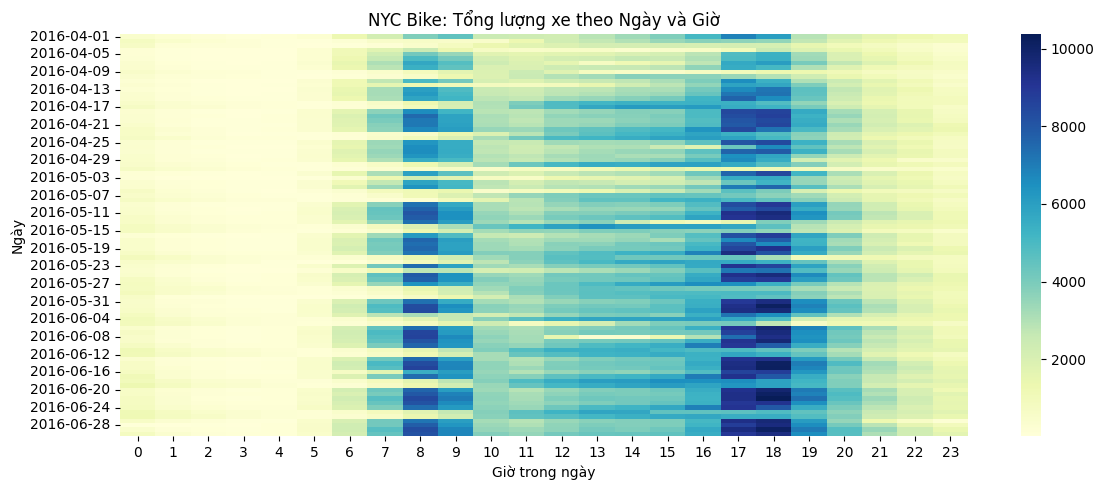

C:\Users\Admin\AppData\Local\Temp\ipykernel_3132\4085244371.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour


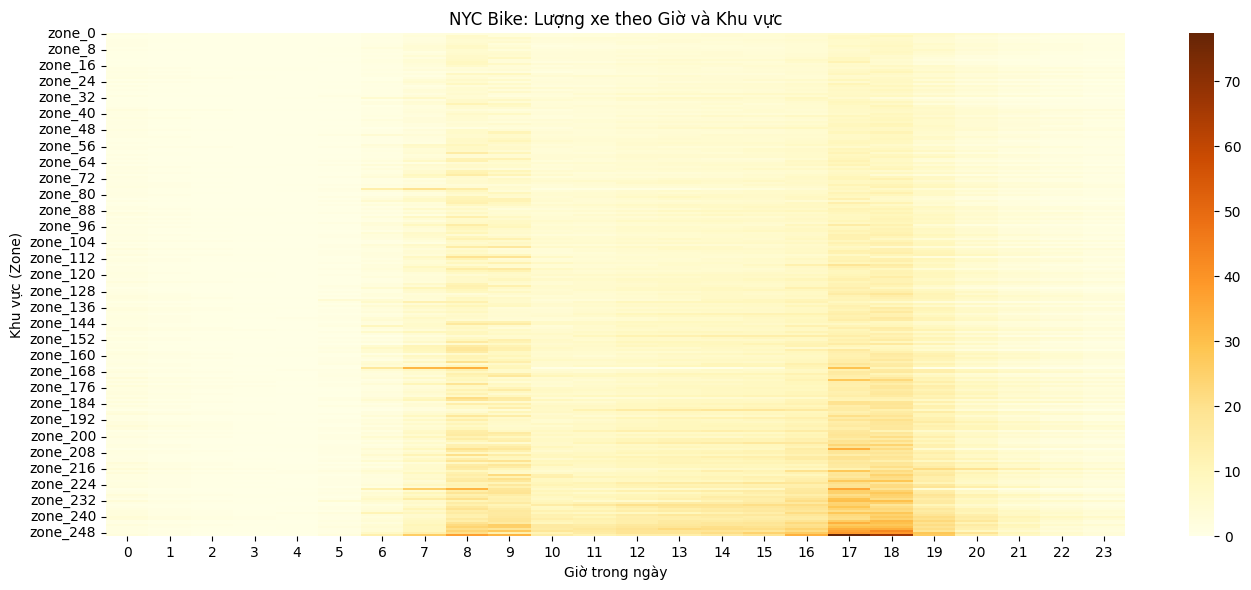

NYC Taxi: T = 4368, N = 266


C:\Users\Admin\AppData\Local\Temp\ipykernel_3132\4085244371.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_total['hour'] = df_total.index.floor('H').hour


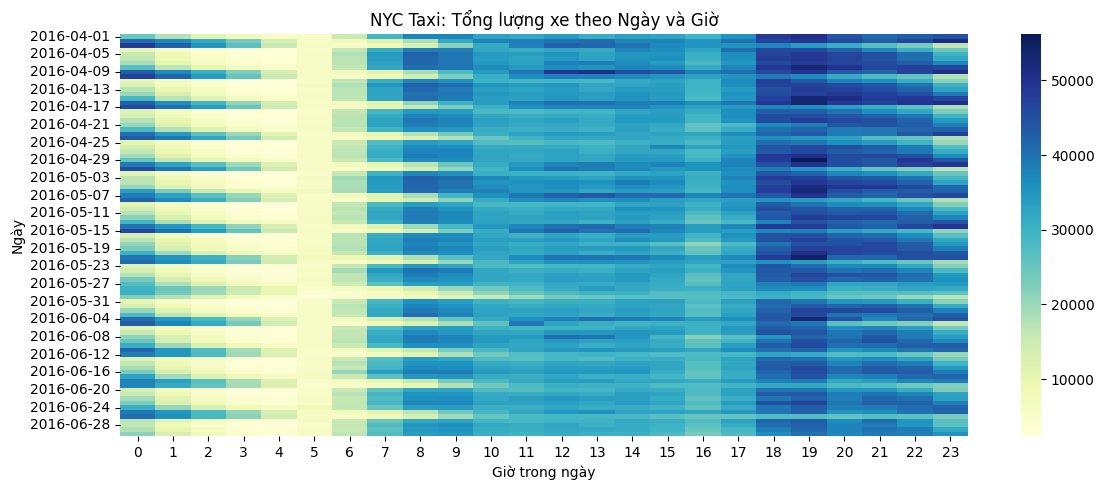

C:\Users\Admin\AppData\Local\Temp\ipykernel_3132\4085244371.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour


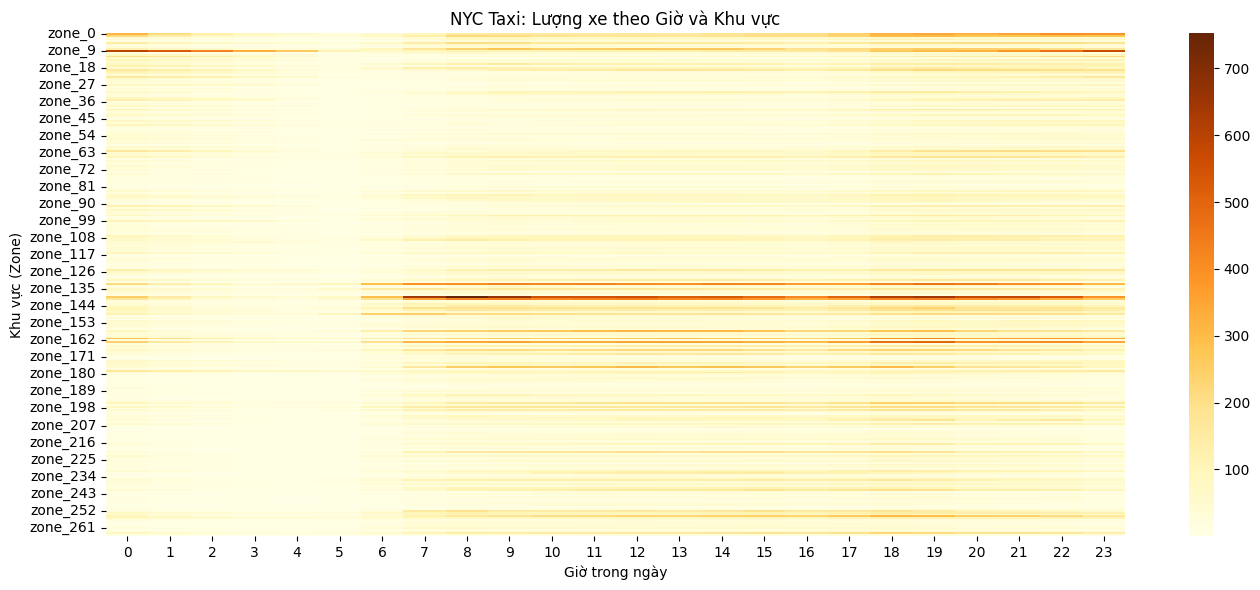

Boston Bike: T = 4416, N = 201


C:\Users\Admin\AppData\Local\Temp\ipykernel_3132\4085244371.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_total['hour'] = df_total.index.floor('H').hour


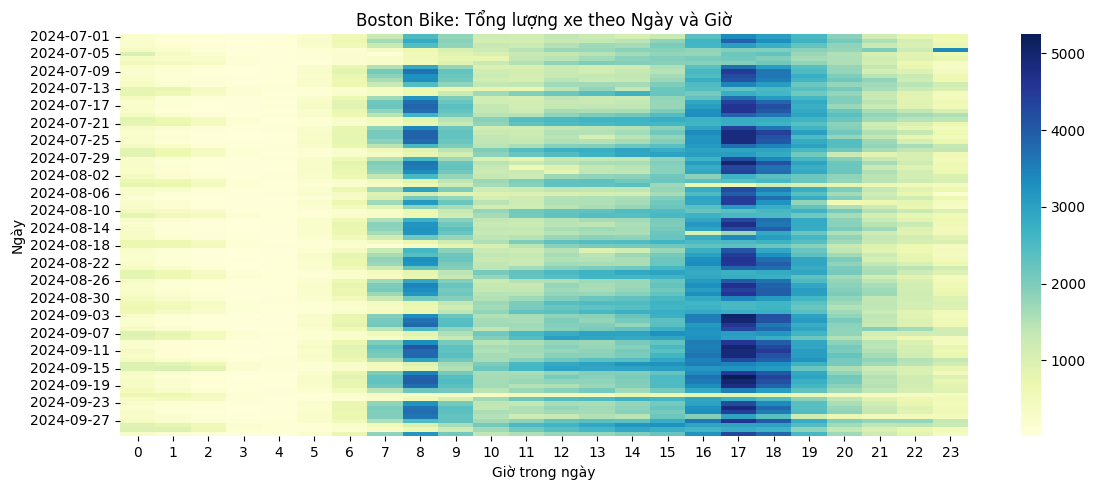

C:\Users\Admin\AppData\Local\Temp\ipykernel_3132\4085244371.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour


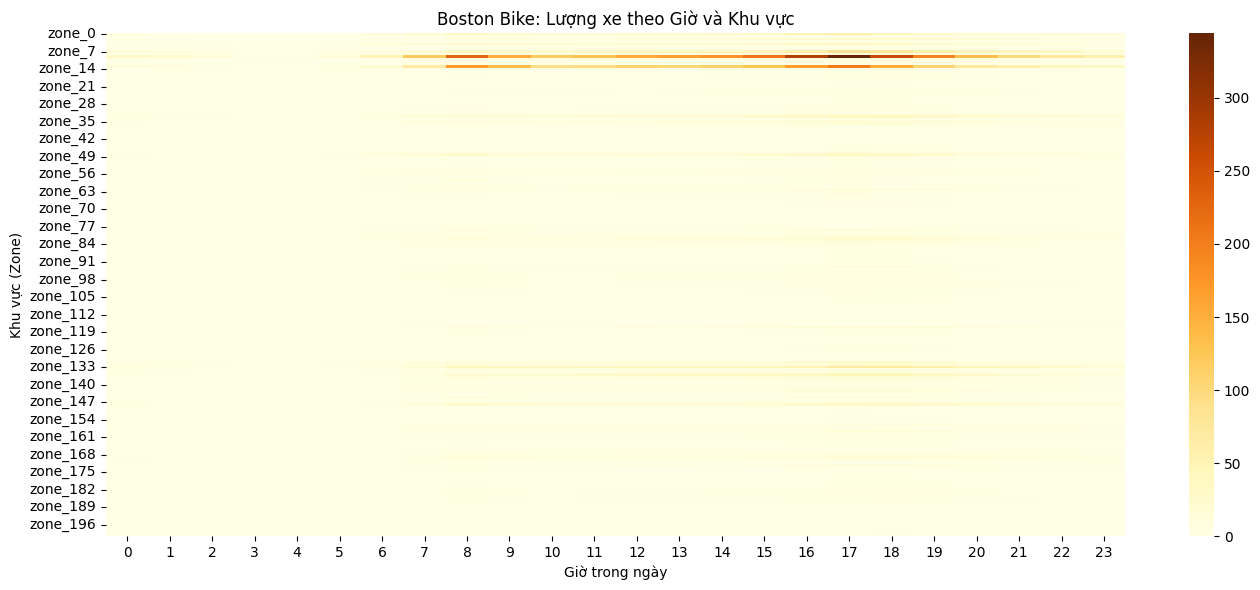

Boston Bike: T = 4416, N = 145


C:\Users\Admin\AppData\Local\Temp\ipykernel_3132\4085244371.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_total['hour'] = df_total.index.floor('H').hour


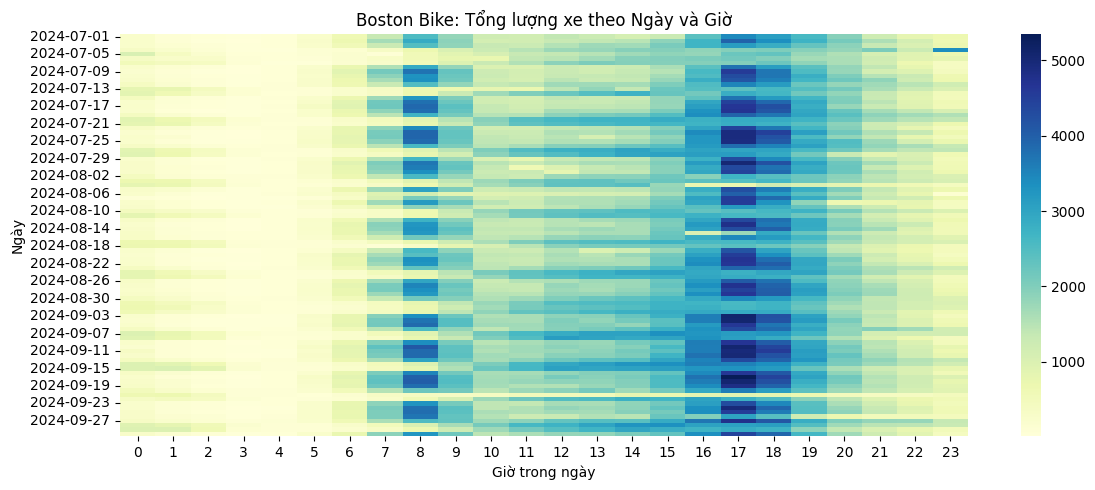

C:\Users\Admin\AppData\Local\Temp\ipykernel_3132\4085244371.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour


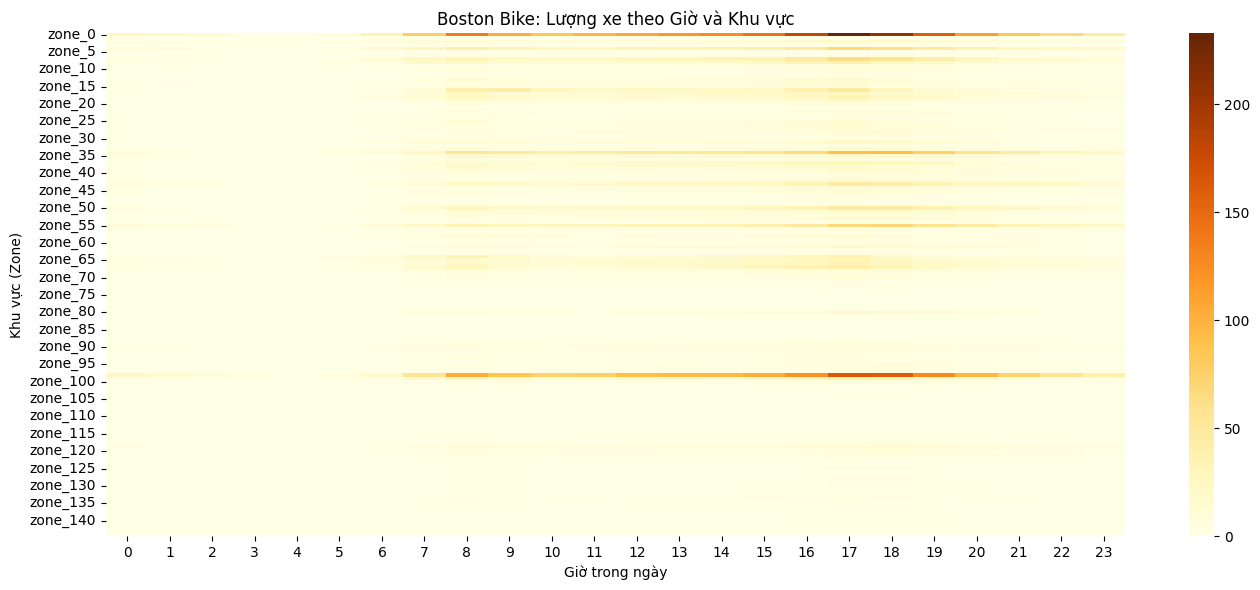

Bay Bike: T = 4416, N = 133


C:\Users\Admin\AppData\Local\Temp\ipykernel_3132\4085244371.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_total['hour'] = df_total.index.floor('H').hour


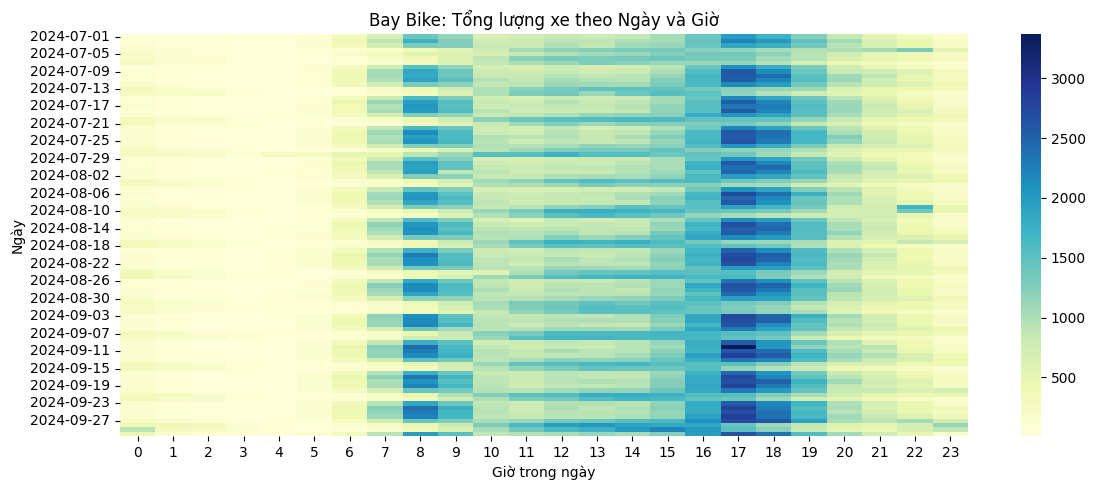

C:\Users\Admin\AppData\Local\Temp\ipykernel_3132\4085244371.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour


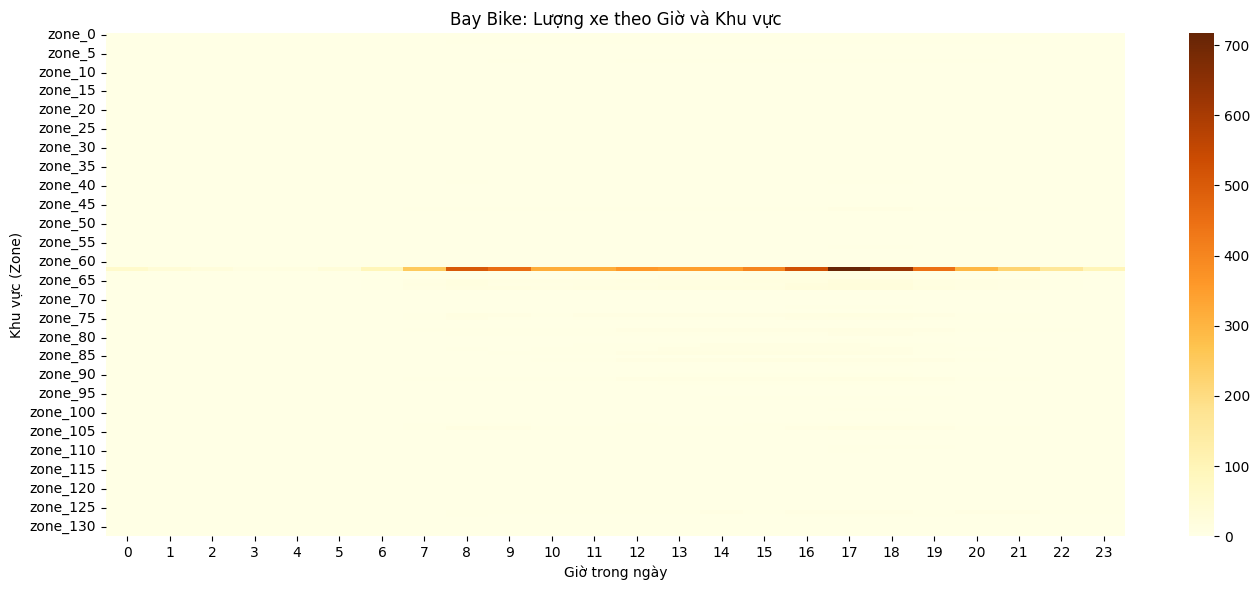

Bỏ node hoạt động mạnh nhất: zone_62


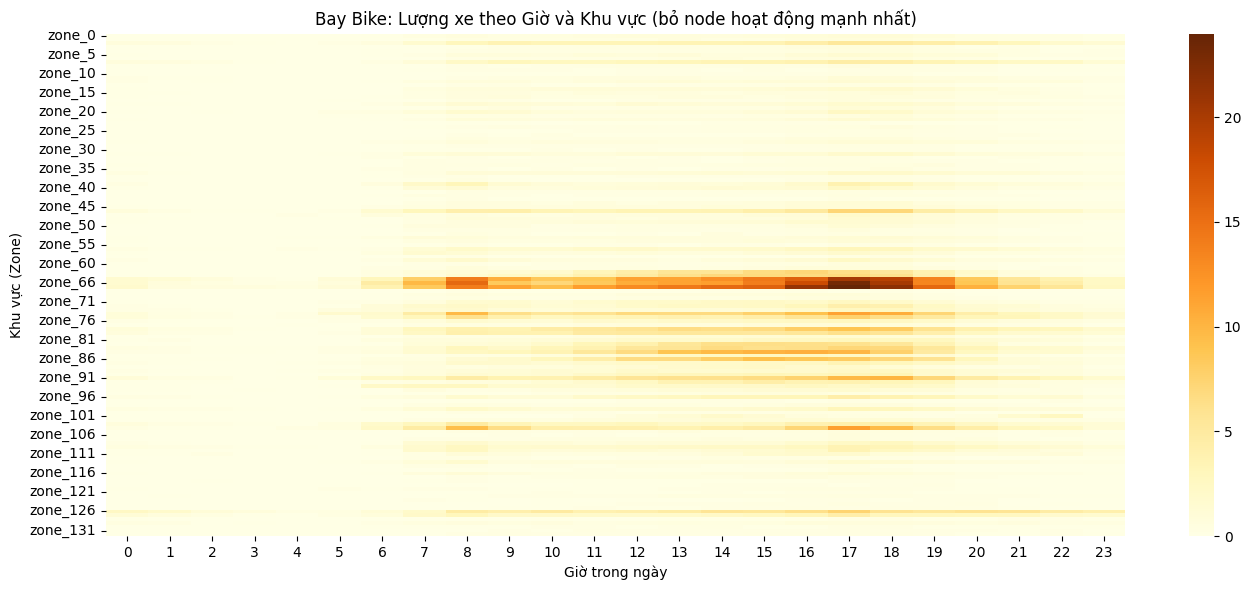

DC Bike: T = 4416, N = 117


C:\Users\Admin\AppData\Local\Temp\ipykernel_3132\4085244371.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_total['hour'] = df_total.index.floor('H').hour


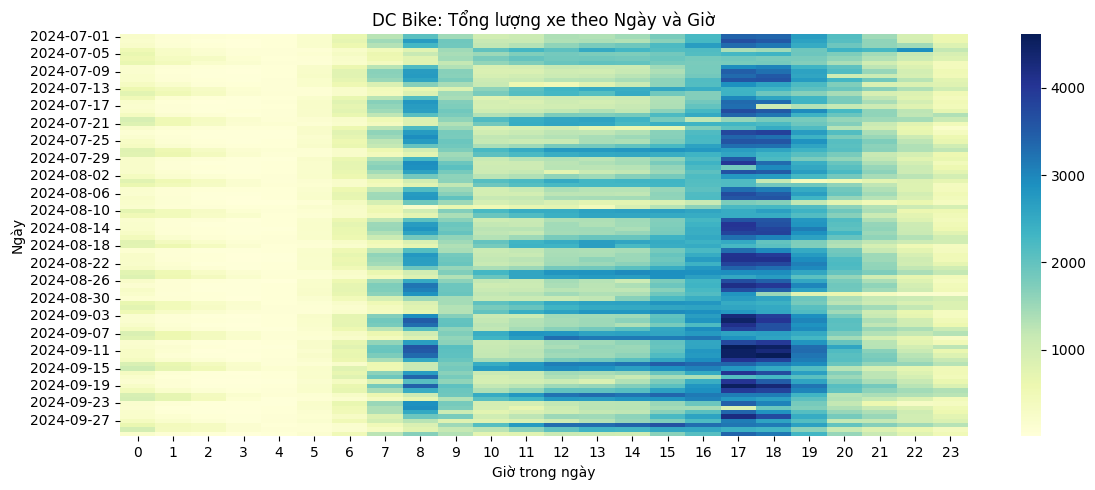

C:\Users\Admin\AppData\Local\Temp\ipykernel_3132\4085244371.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour


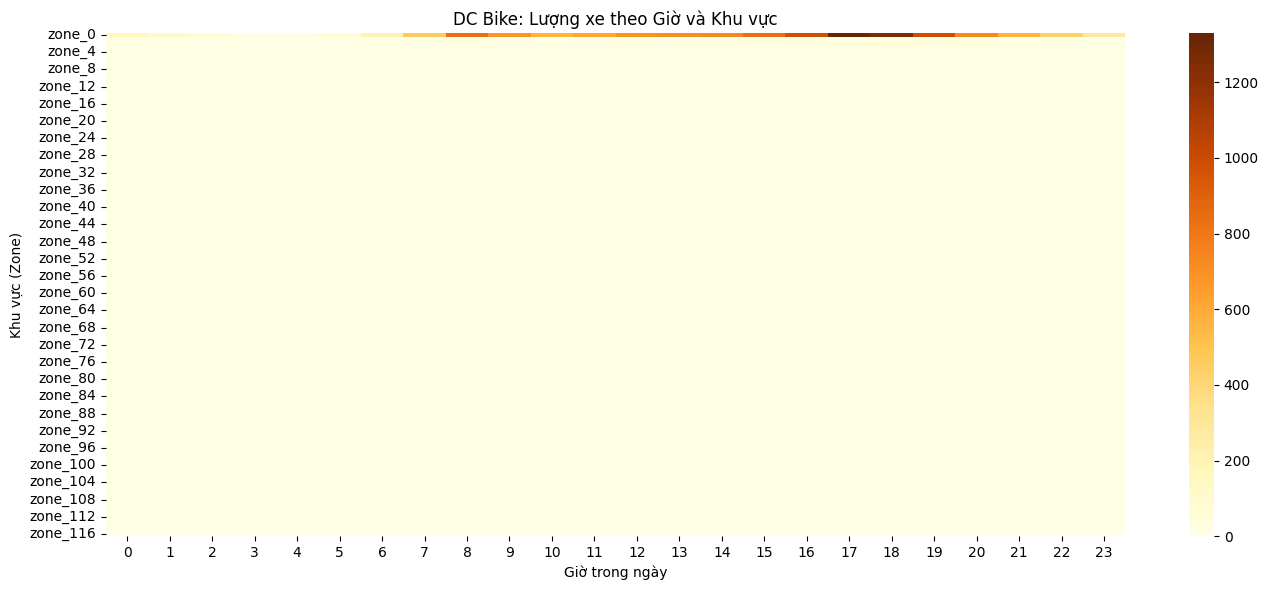

Bỏ node hoạt động mạnh nhất: zone_0


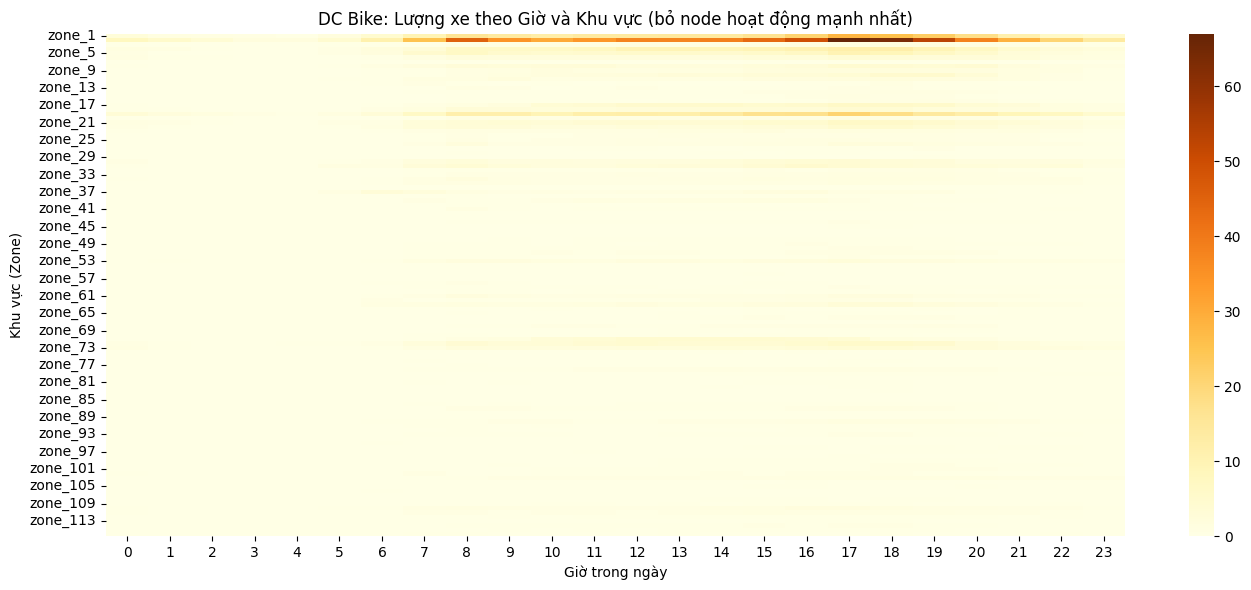

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h5py

def plot_city_heatmaps(file_path, city_name, pick_key='bike_pick', drop_key='bike_drop', start_time_str='2016-04-01 00:00:00'):
    with h5py.File(file_path, 'r') as f:
        bike_pick = np.array(f[pick_key])
        bike_drop = np.array(f[drop_key])
    T, N = bike_pick.shape
    print(f"{city_name}: T = {T}, N = {N}")
    start_time = pd.Timestamp(start_time_str)
    time_index = pd.date_range(start=start_time, periods=T, freq='30min')
    df_pick = pd.DataFrame(bike_pick, index=time_index, columns=[f'zone_{i}' for i in range(N)])
    df_drop = pd.DataFrame(bike_drop, index=time_index, columns=[f'zone_{i}' for i in range(N)])
    df_total = df_pick + df_drop
    df_total['day'] = df_total.index.date
    df_total['hour'] = df_total.index.floor('H').hour

    heatmap_day_hour = df_total.groupby(['day', 'hour']).sum().sum(axis=1).unstack()
    plt.figure(figsize=(12, 5))
    sns.heatmap(heatmap_day_hour, cmap='YlGnBu')
    plt.title(f"{city_name}: Tổng lượng xe theo Ngày và Giờ")
    plt.xlabel("Giờ trong ngày")
    plt.ylabel("Ngày")
    plt.tight_layout()
    plt.show()

    df_hour_zone = df_total.drop(columns=['day', 'hour'])
    df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour
    heatmap_zone_hour = df_hour_zone.groupby('hour').mean().T
    plt.figure(figsize=(14, 6))
    sns.heatmap(heatmap_zone_hour, cmap='YlOrBr')
    plt.title(f"{city_name}: Lượng xe theo Giờ và Khu vực")
    plt.xlabel("Giờ trong ngày")
    plt.ylabel("Khu vực (Zone)")
    plt.tight_layout()
    plt.show()


    if city_name in ['DC Bike', 'Bay Bike']:
        zone_sums = df_hour_zone.drop(columns=['hour']).sum()
        max_zone = zone_sums.idxmax()
        print(f"Bỏ node hoạt động mạnh nhất: {max_zone}")
        df_hour_zone = df_hour_zone.drop(columns=[max_zone])

        heatmap_zone_hour = df_hour_zone.groupby('hour').mean().T
        plt.figure(figsize=(14, 6))
        sns.heatmap(heatmap_zone_hour, cmap='YlOrBr')
        plt.title(f"{city_name}: Lượng xe theo Giờ và Khu vực (bỏ node hoạt động mạnh nhất)" if city_name in ['DC Bike', 'Bay Bike'] else f"{city_name}: Lượng xe theo Giờ và Khu vực")
        plt.xlabel("Giờ trong ngày")
        plt.ylabel("Khu vực (Zone)")
        plt.tight_layout()
        plt.show()

city_files = [
    {'file': 'data/nogrid/NYC/bike_data.h5', 'city': 'NYC Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2016-04-01 00:00:00'},
    {'file': 'data/nogrid/NYC/taxi_data.h5', 'city': 'NYC Taxi', 'pick_key': 'taxi_pick', 'drop_key': 'taxi_drop', 'start': '2016-04-01 00:00:00'},
    {'file': 'data/nogrid/BOSTON/bike_data.h5', 'city': 'Boston Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/BOSTON2/bike_data.h5', 'city': 'Boston Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/BAY/bike_data.h5', 'city': 'Bay Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/DC/bike_data.h5', 'city': 'DC Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
]

for info in city_files:
    plot_city_heatmaps(info['file'], info['city'], info['pick_key'], info['drop_key'], info['start'])